[1.4978646378755287, 0.9130564841519689, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653]


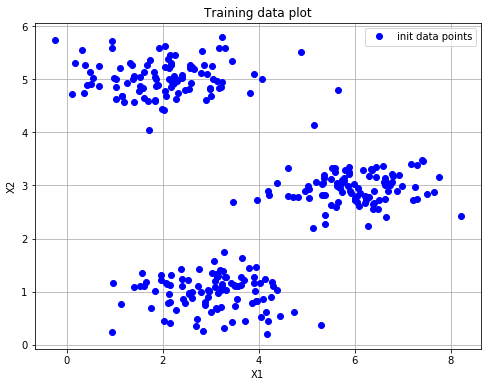

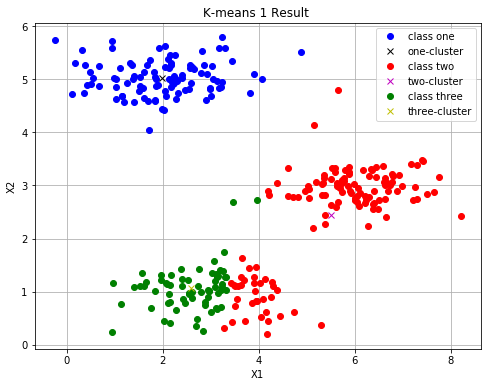

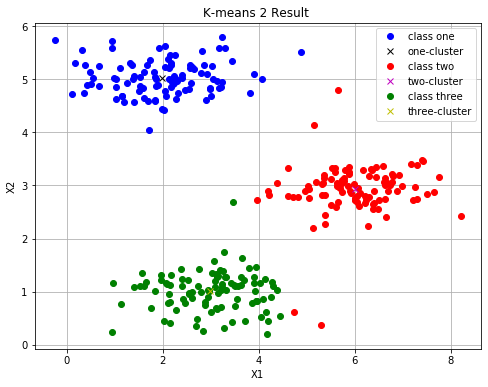

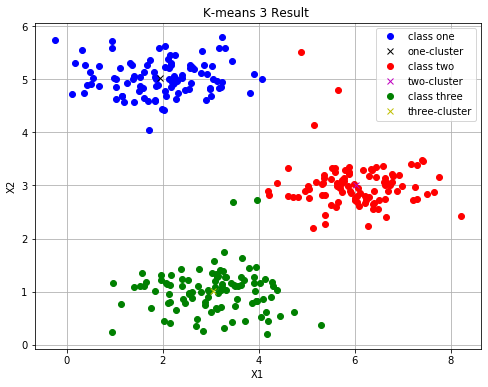

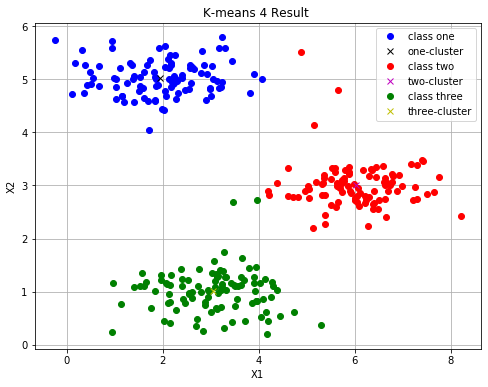

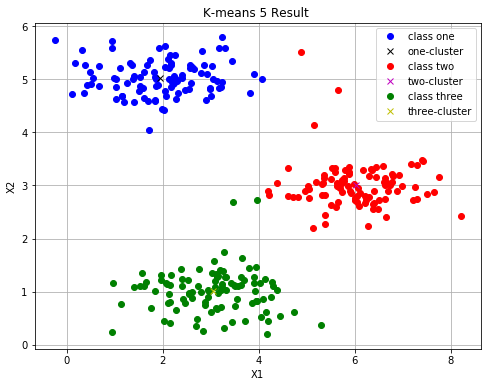

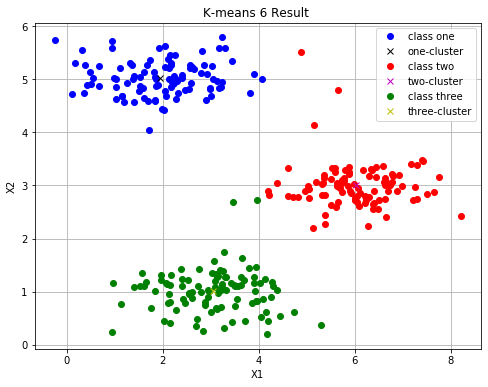

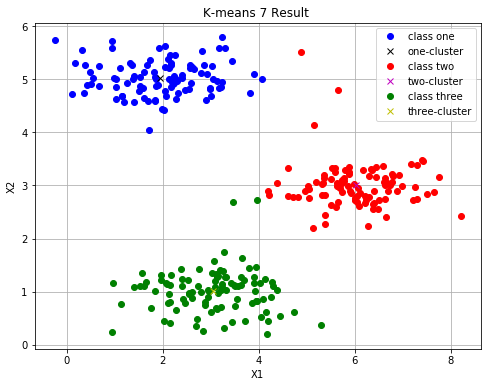

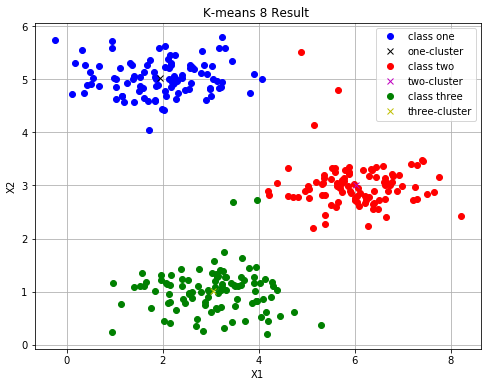

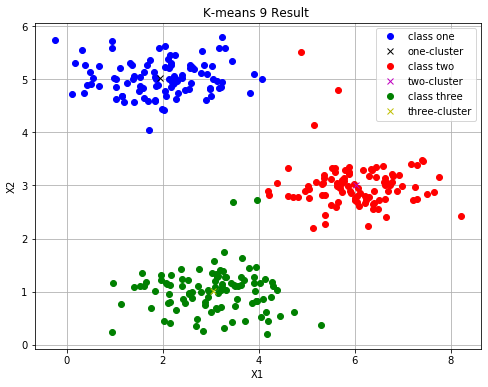

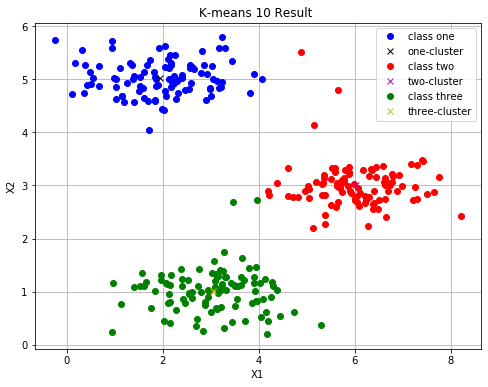

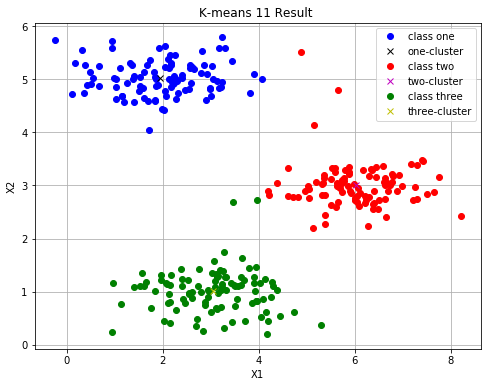

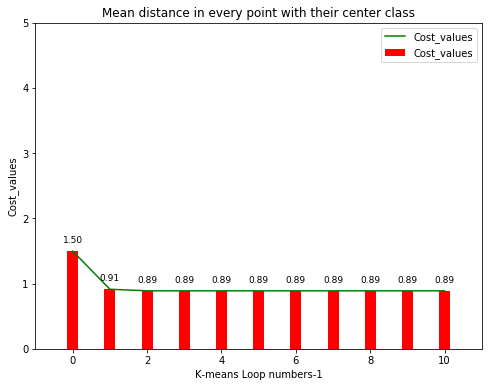

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import  scipy.io#导入用来读取.mat 文件
import random
#读取数据
data='data/ex7data1.mat'
mat = scipy.io.loadmat(data)
cols = mat['X']
m=cols.shape[0]#数据项大小
n=cols.shape[1]#数据项维数
iterations = 1#初始化随机选取数据簇中心的K值次数
C_i=np.zeros((m,1))#初始化ci，ci的第i个值分别代表对应xi所属的第几类
K=3#初始化簇类的个数
k_cluster_vals=np.zeros((K,cols.shape[1]))#初始化第k个簇中心的点的值

#初步观察数据
def plot_init_data():
    plt.figure(figsize=(8,6))
    plt.plot(cols[:,0],cols[:,1],'bo',label='init data points')
    plt.grid(True)
    plt.title('Training data plot')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
#lot_init_data()
#C_i
#k_cluster_vals
#构建K-means算法
list_k=[]
flist=np.array([])
#设置迭代次数loop
loop=9
cost=[]
cluster_class=[]

def K_m(K,X,k_cluster_vals):
    list_v=[]
    closest_val = 1000000#初始最小距离为0
    M=X.shape[1]
    for j in range(X.shape[0]):
        for o in range(k_cluster_vals.shape[0]):
            val=0
            for p in range(k_cluster_vals.shape[1]):
                val= val+(k_cluster_vals[o][p]-X[j][p])**2
            if(closest_val>val):
                closet_val=val
            list_v.append(val)
    C_i=np.argmin(np.array(list_v).reshape((X.shape[0],K)),axis=1).reshape((X.shape[0],1))
    cluster_class.append(C_i.tolist())
    #cost.append(np.mean(list_v))
    X=np.hstack((X,C_i))
    for i in range(K):
        mask = X[:,n]==i
        k_cluster_vals[i]=np.mean(X[:,0:n][mask],axis=0)
    return X,k_cluster_vals

#计算损失函数优化目标
def costcompute(X,cluster_vals):
    values = 0#用作累加
    #分别计算三类中心点的值
    mask1=X[:,n]==0
    x1=X[mask1]
    mask2=X[:,n]==1
    x2=X[mask2]
    mask3=X[:,n]==2
    x3=X[mask3]
    for i in range(x1.shape[0]):
        values=values+(x1[i,0]-cluster_vals[0][0])**2+(x1[i,1]-cluster_vals[0][1])**2
    for i in range(x2.shape[0]):
        values=values+(x2[i,0]-cluster_vals[1][0])**2+(x2[i,1]-cluster_vals[1][1])**2    
    for i in range(x3.shape[0]):
        values=values+(x3[i,0]-cluster_vals[2][0])**2+(x3[i,1]-cluster_vals[2][1])**2
    return values/X.shape[0]

def K_means(K,X,k_cluster_vals,loop_num):
    list_v=[]
    closest_val = 1000000#初始最小距离为0
    M=X.shape[1]
    #然后分别计算数据集中每一个点与簇中心点的距离，选取最近的簇中心点，并且归到该点中，即设置C-i的值
    for j in range(X.shape[0]):
        for o in range(k_cluster_vals.shape[0]):
            val=0
            for p in range(k_cluster_vals.shape[1]):
                val= val+(k_cluster_vals[o][p]-X[j][p])**2
            if(closest_val>val):
                closet_val=val
            list_v.append(val)
    #根据运算得到C-i,使用方法np.argmin(array,axis=0/1),当axis为1时时按每一行求出最小值的索引，为0时则为列
    #print(np.array(list_v).shape)
    #print(np.array(list_v).reshape((X.shape[0],K)))
    C_i=np.argmin(np.array(list_v).reshape((X.shape[0],K)),axis=1).reshape((X.shape[0],1))#得到的ci中0代表第一类，1代表第二类。。。
    #print(C_i)
    cluster_class.append(C_i.tolist())
    #得到C_i之后然后根据新的分类点更新不同簇的中心点的值，为该簇类所有点的均值
    #print(list_v)
    print(np.mean(list_v))
    cost.append(np.mean(list_v))
    print(X.shape)
    X=np.hstack((X,C_i))
    #print(X[0:100])
    for i in range(K):
        #更新第i类的中心点的值
        mask = X[:,n]==i
        #print(X[mask])
        k_cluster_vals[i]=np.mean(X[:,0:n][mask],axis=0)#将第i类中心点的值更新为均值
    print(k_cluster_vals)
    #再将新的中心点值与X进行K——means比较
    #print(X)
    if(loop_num==1):
        return 
    else:
        loop_num=loop_num-1
        #print(loop_num)
        K_means(K,X[:,0:n],k_cluster_vals,loop_num)
        #print(X.shape)
        #return X[0:100]
    
def iterations_Km(iterations):
    for i in range(iterations):#随机初始化簇中心点选取点的值，总共选取iterations次
        #随机生成K个簇中心值
        k_cluster_vals=np.array(random.sample(list(cols),K)).reshape((K,cols.shape[1]))
        #print(k_cluster_vals)
    return k_cluster_vals



def plot_K_means(X,cluster,strs):
    plt.grid(True)
    plt.figure(figsize=(8,6))
    plt.xlabel('X1')
    plt.ylabel('X2')
    mask1=X[:,2]==0
    mask2=X[:,2]==1
    mask3=X[:,2]==2
    plt.plot(X[:,0][mask1],X[:,1][mask1],'bo',label='class one')
    plt.plot(cluster[0][0],cluster[0][1],'kx',label='one-cluster')
    plt.plot(X[:,0][mask2],X[:,1][mask2],'ro',label='class two')
    plt.plot(cluster[1][0],cluster[1][1],'mx',label='two-cluster')
    plt.plot(X[:,0][mask3],X[:,1][mask3],'go',label='class three')
    plt.plot(cluster[2][0],cluster[2][1],'yx',label='three-cluster')
    plt.title('K-means %s Result '%strs)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
#k-means第一次       
init_cluster=iterations_Km(iterations)

#K_means(K,cols,init_cluster,loop)

final_x1,final_k_v1=K_m(K,cols,init_cluster)
plot_init_data()
#print(cols[200:202])
#plot_distance()

plot_K_means(final_x1,final_k_v1,'1')

#print(final_x1.shape)

cost.append(costcompute(final_x1,final_k_v1))

#k-means第二次
#final_x2,final_k_v2=K_m(K,cols,final_k_v1)
#plot_K_means(final_x2,final_k_v2,'2')
#cost.append(costcompute(final_x2,final_k_v2))
#k-means第三次
#final_x3,final_k_v3=K_m(K,cols,final_k_v2)
#plot_K_means(final_x3,final_k_v3,'3')
#cost.append(costcompute(final_x3,final_k_v3))
#k-means第四次
#final_x4,final_k_v4=K_m(K,cols,final_k_v3)
#plot_K_means(final_x4,final_k_v4,'4')
#plot cost
#cost.append(costcompute(final_x4,final_k_v4))
#print(cost)

#将上述手动迭代转换为自动迭代
def k_auto(final_x,final_k_v,auto_num):
    final_xf ,final_kf = K_m(K,cols,init_cluster)
    plot_K_means(final_xf,final_kf,str(abs(loop-auto_num+2)))
    cost.append(costcompute(final_xf,final_kf))
    if(auto_num==0):
        return
    else:
        auto_num=auto_num-1
        k_auto(final_xf,final_kf,auto_num)
    
 
#显示K-means算法运行次数与损失函数大小的关系
def plot_distance():
    plt.grid(True)
    plt.figure(figsize=(8,6))
    plt.xlim(-1,loop+2,1)
    plt.ylim(0,5,1)
    plt.xlabel('K-means Loop numbers-1')
    plt.ylabel('Cost_values')
    plt.bar(range(len(cost)),cost,width=0.3,label='Cost_values',color='r')
    for a,b in zip(range(len(cost)),cost):
        plt.text(a,b+0.1,'%.2f'%b,ha='center',va='bottom',fontsize=9)
    plt.plot(range(len(cost)),cost,'g-',label='Cost_values')
    plt.title('Mean distance in every point with their center class')
    plt.legend()
k_auto(final_x1,final_k_v1,loop)
print(cost)  
plot_distance()

In [120]:
(6.00506534-5.19590823)**2+(2.72784171-3.06972937)**2

0.771622400723828

In [108]:
(6.00506534-2.98340757)**2+(2.72784171-4.84046406)**2

13.593588872720899

In [109]:
cost

[15.293779283458264, 12.128558640459447]

(3, 2)


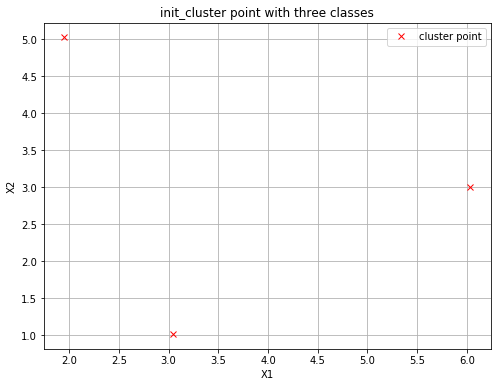

In [32]:
print(init_cluster.shape)
plt.figure(figsize=(8,6))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('init_cluster point with three classes')
plt.plot(init_cluster[:,0],init_cluster[:,1],'rx',label='cluster point')
plt.grid(True)
plt.legend()


In [128]:
cluster_class[1]

[[0],
 [2],
 [2],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]

In [33]:
print(init_cluster)

[[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]


In [37]:
print(cost)

[1.4978646378755287, 0.9130564841519689, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653, 0.8888617321830653]
